# Plant Disease Prediction

## Importing Dataset

Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Importing libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image preprocessing

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 71042 files belonging to 47 classes.


### Validation Image Preprocessing

In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18319 files belonging to 47 classes.


#### To avoid Overshooting Loss function
1. Choose small learning rate default 0.001 here we have taken 0.0001
2. There may be chance of underfitting so increase number of neuron
3. Add more Convolutional Layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [4]:
cnn = tf.keras.models.Sequential()

### Building Convolution Layer

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [6]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [10]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [11]:
cnn.add(tf.keras.layers.Flatten())

In [12]:
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))

In [13]:
cnn.add(tf.keras.layers.Dropout(0.4)) #To avoid overfitting

In [14]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=47,activation='softmax'))

### Compiling and Training Phase

In [15]:
cnn.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 63, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                    

In [17]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2221/2221 [==============================] - 406s 178ms/step - loss: 1.4432 - accuracy: 0.5816 - val_loss: 0.5828 - val_accuracy: 0.8205
Epoch 2/10
2221/2221 [==============================] - 321s 144ms/step - loss: 0.4570 - accuracy: 0.8548 - val_loss: 0.3460 - val_accuracy: 0.8936
Epoch 3/10
2221/2221 [==============================] - 326s 147ms/step - loss: 0.2662 - accuracy: 0.9147 - val_loss: 0.2006 - val_accuracy: 0.9348
Epoch 4/10
2221/2221 [==============================] - 326s 147ms/step - loss: 0.1897 - accuracy: 0.9381 - val_loss: 0.1974 - val_accuracy: 0.9335
Epoch 5/10
2221/2221 [==============================] - 333s 150ms/step - loss: 0.1388 - accuracy: 0.9544 - val_loss: 0.1525 - val_accuracy: 0.9522
Epoch 6/10
2221/2221 [==============================] - 324s 146ms/step - loss: 0.1083 - accuracy: 0.9650 - val_loss: 0.1257 - val_accuracy: 0.9597
Epoch 7/10
2221/2221 [==============================] - 322s 145ms/step - loss: 0.0879 - accuracy: 0.9710 - val_

## Evaluating Model

In [18]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2221/2221 [==============================] - 117s 53ms/step - loss: 0.0285 - accuracy: 0.9905
Training accuracy: 0.9904563426971436


In [19]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

573/573 [==============================] - 32s 55ms/step - loss: 0.1227 - accuracy: 0.9624
Validation accuracy: 0.9623887538909912


### Saving Model

In [20]:
cnn.save('trained_plant_disease_model.keras')

In [21]:
training_history.history #Return Dictionary of history

{'loss': [1.4431577920913696,
  0.45701876282691956,
  0.2661973536014557,
  0.18965885043144226,
  0.1388041079044342,
  0.10828784108161926,
  0.08785629272460938,
  0.07834365963935852,
  0.06518691778182983,
  0.057299982756376266],
 'accuracy': [0.5815573930740356,
  0.8548464179039001,
  0.9146701693534851,
  0.9380788803100586,
  0.9543790817260742,
  0.9650347828865051,
  0.9710312485694885,
  0.9739168286323547,
  0.9788012504577637,
  0.9810534715652466],
 'val_loss': [0.5828101634979248,
  0.34598687291145325,
  0.20057451725006104,
  0.19739417731761932,
  0.1524980217218399,
  0.1257457733154297,
  0.18560680747032166,
  0.11306332051753998,
  0.18105538189411163,
  0.12273004651069641],
 'val_accuracy': [0.8204596042633057,
  0.8936077356338501,
  0.9347671866416931,
  0.9335116744041443,
  0.9522354006767273,
  0.9597139358520508,
  0.9424641132354736,
  0.9661007523536682,
  0.947704553604126,
  0.9623887538909912]}

In [22]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [23]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Accuracy Visualization

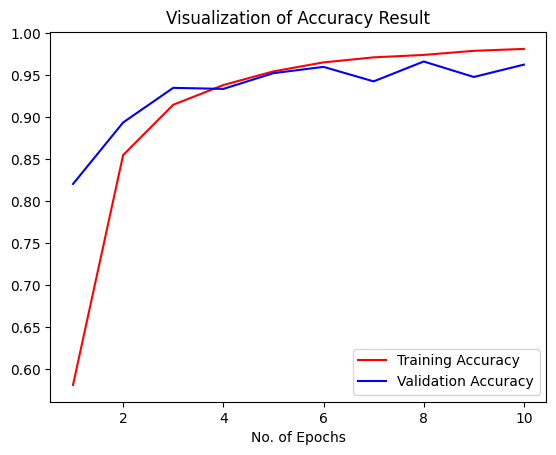

In [24]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Some other metrics for model evaluation

In [25]:
class_name = validation_set.class_names

In [26]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 18319 files belonging to 47 classes.


In [27]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)

18319/18319 [==============================] - 127s 7ms/step


In [28]:
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [29]:
Y_true

<tf.Tensor: shape=(18319,), dtype=int64, numpy=array([ 0,  0,  0, ..., 46, 46, 46], dtype=int64)>

In [30]:
predicted_categories

<tf.Tensor: shape=(18319,), dtype=int64, numpy=array([ 0,  0,  0, ..., 46, 46, 46], dtype=int64)>

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(Y_true,predicted_categories)

In [32]:
# Precision Recall Fscore
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.98      0.90      0.94       504
                                 Apple___Black_rot       0.93      0.99      0.96       497
                          Apple___Cedar_apple_rust       0.99      0.95      0.97       440
                                   Apple___healthy       0.90      0.99      0.94       502
                       Ashoka___Burning___Diseases       1.00      0.98      0.99       235
                           Ashoka___Healthy___Leaf       1.00      0.96      0.98       114
                         Ashoka___Yellowing___Leaf       0.70      1.00      0.82        16
            Bitter___Gourd___Angular___Leaf___Spot       1.00      1.00      1.00        71
                          Bitter___Gourd___Healthy       1.00      1.00      1.00        24
                 Bitter___Gourd___Mosaic___Viruses       1.00      0.97      0.

### Confusion Matrix Visualization

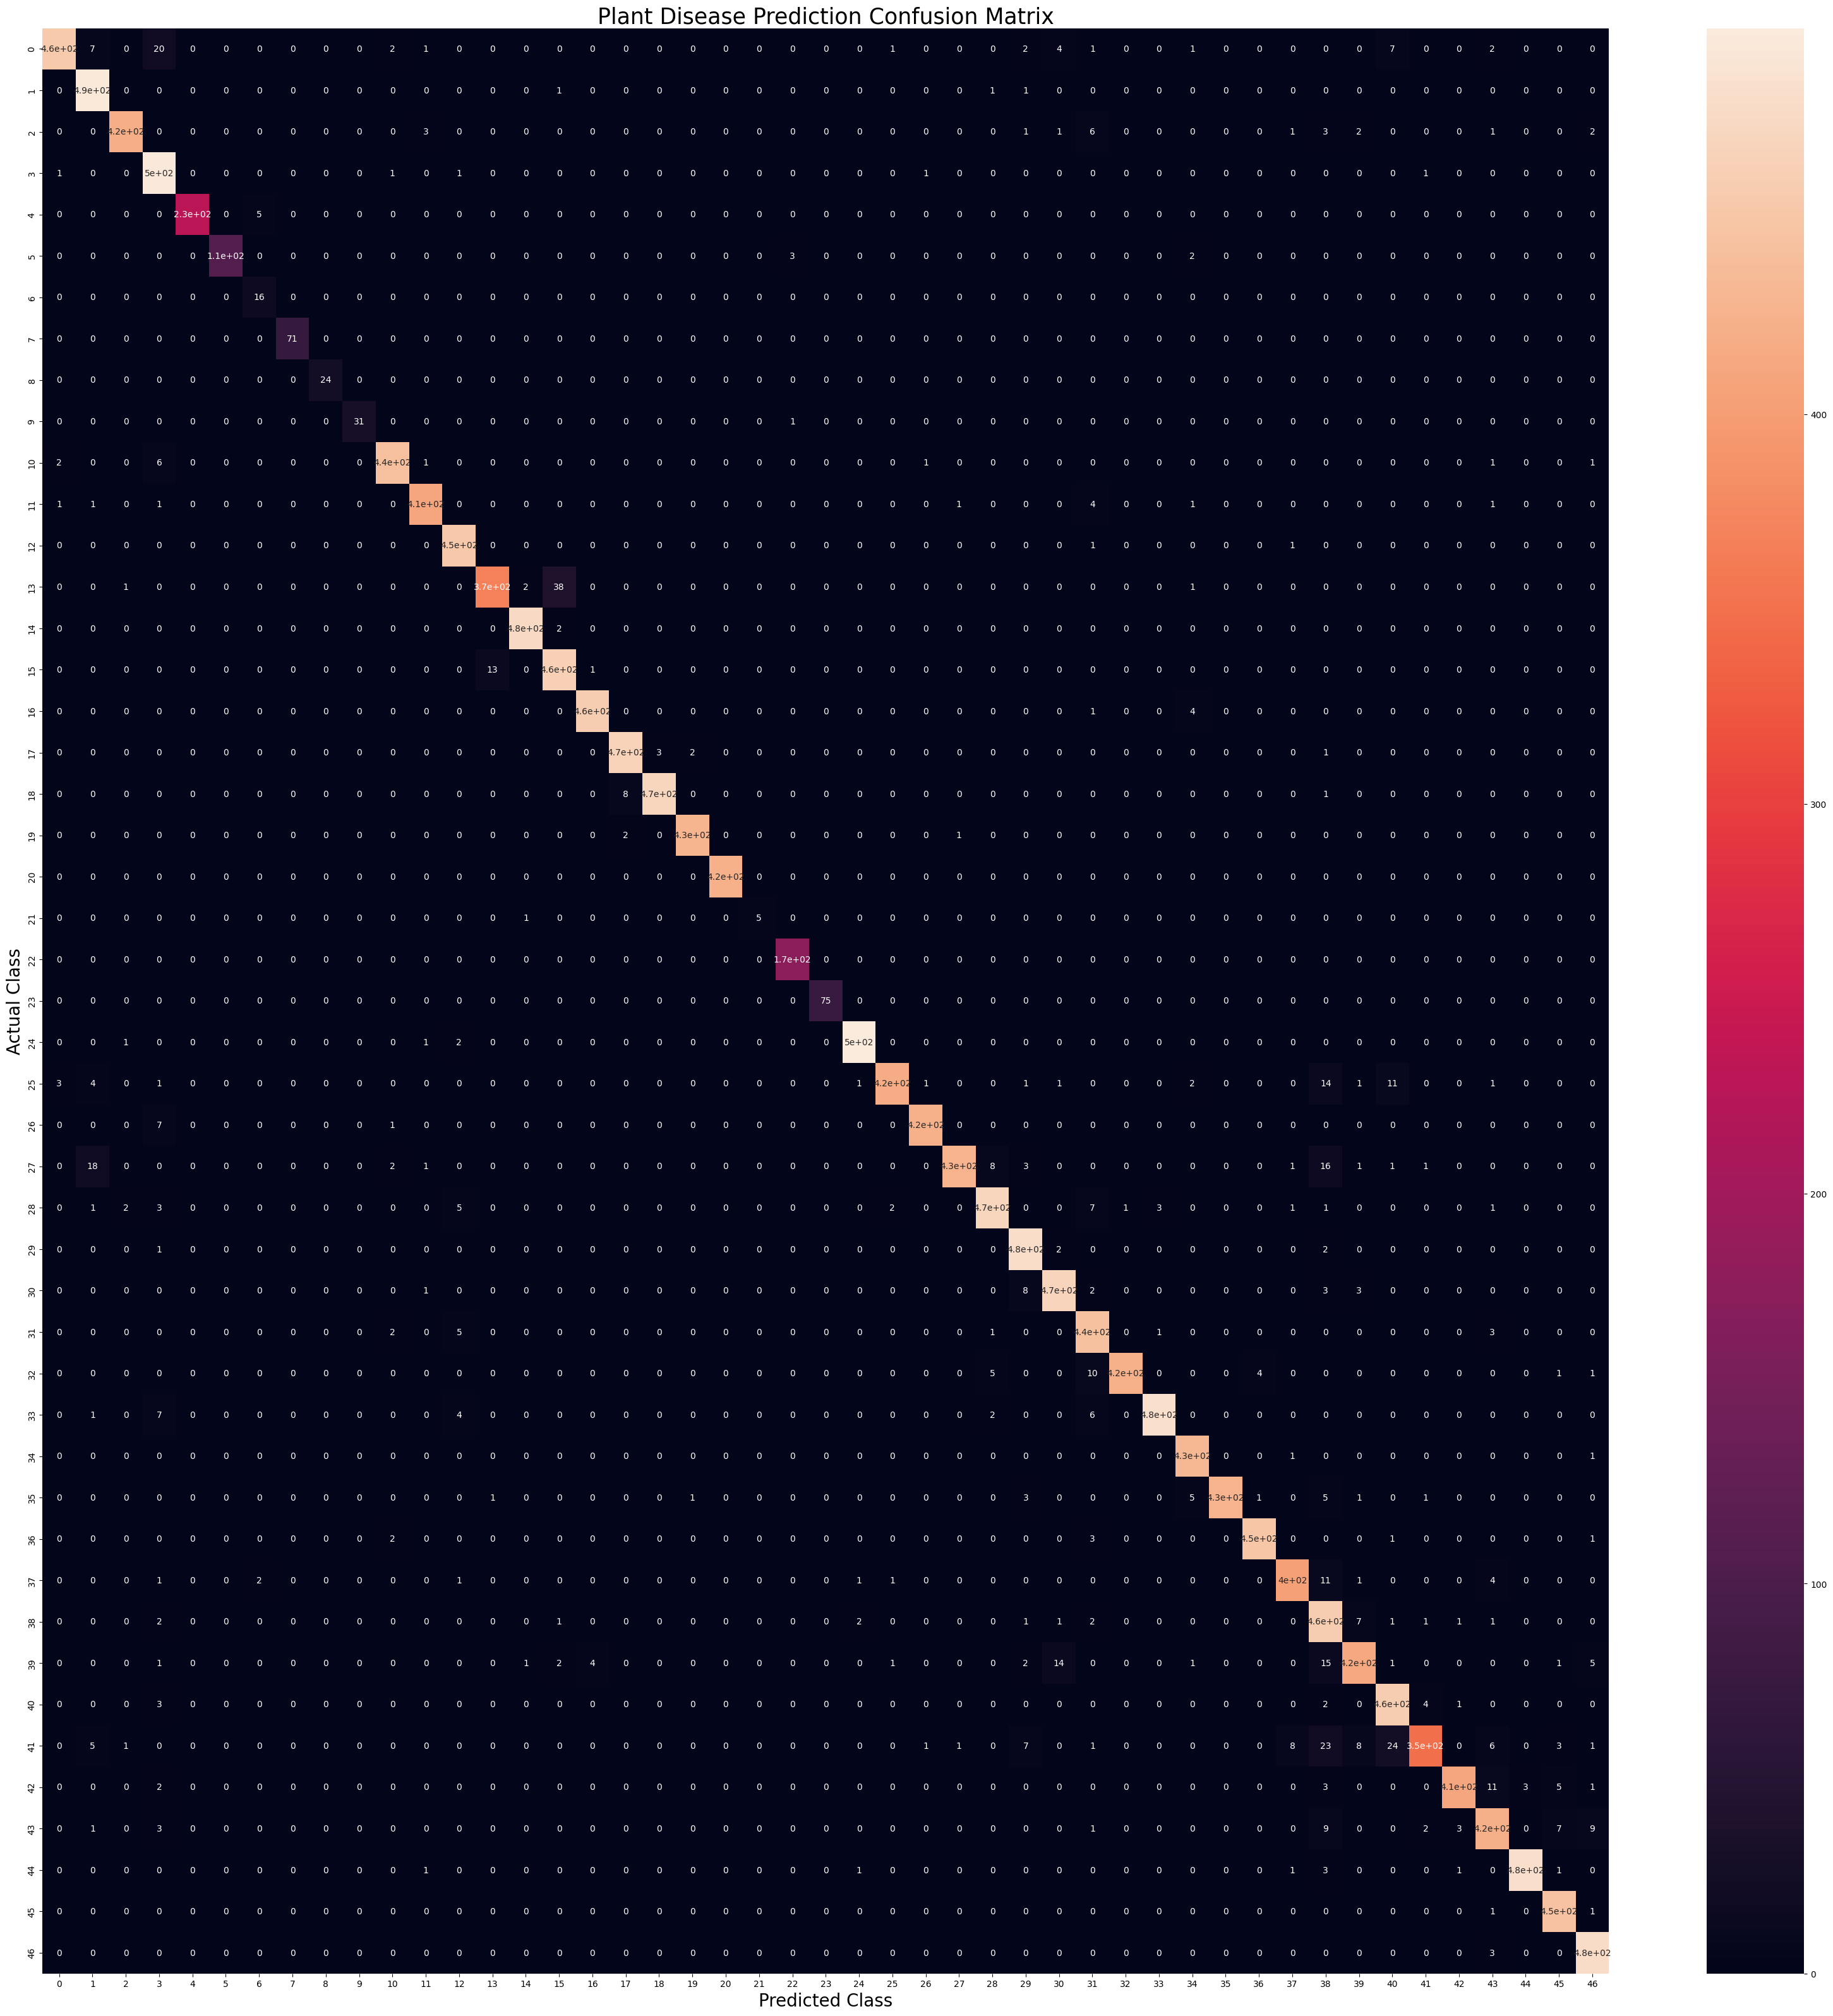

In [33]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm,annot=True,annot_kws={"size": 10})

plt.xlabel('Predicted Class',fontsize = 20)
plt.ylabel('Actual Class',fontsize = 20)
plt.title('Plant Disease Prediction Confusion Matrix',fontsize = 25)
plt.show()